# Python Programming 101 - Guided Practice

Imagine that after you are working as a sales analyst for a brand with presence in the US.

You are asked to look at regional sales data from your vendors and you want to use your newly acquired Python skills...

For this guided practice we will create some fake data related to the average income and population of some cities in the US. 

We will apply the python knowledge we have acquired and see how some popular modules such as pandas, numpy and matplotlib are used.

We can use the Jupyter interface to invoke functionality from the terminal.

For example, we can list the files under the current directory as follows:

In [1]:
!ls

data				Python101_IndPractice.ipynb
Python101_DemoBokeh.ipynb	Python101_IndPractice_Solutions.ipynb
Python101_GuidedPractice.ipynb


# Importing packages and modules

Let us start by importing packages and modules that will be used in this practice.

We will make use of a functions to calculate the average. This is included in the NumPy module.

Also we will use pandas to manipulate data organised in a table format. We call this a *dataframe*.

In [2]:
import numpy as np
import pandas as pd

Let us define some lists that can be used to create a pandas dataframe. Let us start by listing the different cities we are interested in:


In [3]:
cities  = pd.Series(['Atlanta','Lilburn','Athens',
                     'Auburn','Augusta','NYC','Buffalo','Albany',
                     'Miami','Tallahassee'])

Now the states where these cities are:

In [4]:
states = pd.Series(['GA','GA','GA','GA','GA',
                    "NY","NY","NY","FL","FL"])

Let us now list the average income and population for the cities in question:

In [5]:
city_avg_incomes = pd.Series([55000,40000,50000,45000,
                              30000,60000,57000,56000,65000,40000])

city_populations = pd.Series([5000000,250000,100000,
                              50000, 200000,6000000,3000000,400000,
                              4000000,5000000])

### Question

Have you noticed that we are using lists to create the series expected by pandas?

# Pandas dataframe

We are now ready to put all the information above in a single dataframe:


In [6]:
city_table = pd.DataFrame( {'cities': cities,  
             'states': states,
             'city_avg_incomes':city_avg_incomes,
             'city_populations':city_populations
              } )

### Question

Do you remember what is the syntax to define a dictionary in Python?

# Looking at the Dataframe

Let us take a look at the first 6 entries:

In [7]:
city_table.head()

,cities,city_avg_incomes,city_populations,states
0,Atlanta,55000,5000000,GA
1,Lilburn,40000,250000,GA
2,Athens,50000,100000,GA
3,Auburn,45000,50000,GA
4,Augusta,30000,200000,GA


# Manipulating the data 

We can create a column to state the population in millions and another one for the income in thousands. 

Let us define a function that formats a number in terms of millions

### Question

Do you remember how to define a function in Python?

In [8]:
def FormatMillions(x):
    return float(x)/1000000.0

We can now "apply" this function to one of the columns of our dataframe to create a new column:

In [9]:
city_table['pop_in_millions'] = city_table['city_populations'].apply(FormatMillions)

Let us do something similar for the incomes, but format the numbers in terms of thousands. 

In [10]:
def FormatThousands(x):
    return float(x)/1000.0

In [11]:
city_table['income_in_k'] =city_table['city_avg_incomes'].apply(FormatThousands)

Let us see the result:

In [12]:
city_table.head()

,cities,city_avg_incomes,city_populations,states,pop_in_millions,income_in_k
0,Atlanta,55000,5000000,GA,5.00,55.0
1,Lilburn,40000,250000,GA,0.25,40.0
2,Athens,50000,100000,GA,0.10,50.0
3,Auburn,45000,50000,GA,0.05,45.0
4,Augusta,30000,200000,GA,0.20,30.0


### Question

Why do you think are the functions above useful for?

# Data understanding

How many columns and rows do we have in the dataframe?

In [14]:
city_table.shape

(10, 6)

We have 10 records (rows) and 6 fields (columns)

Let us select some of the data points. For instance the first 4 entreos for population and income.

In [15]:
city_table[0:4][["pop_in_millions",'income_in_k']]

,pop_in_millions,income_in_k
0,5.00,55.0
1,0.25,40.0
2,0.10,50.0
3,0.05,45.0


We can select some data based on conditionals. For instance let us show only those records where the income is greater than 30l.§

In [16]:
city_table[(city_table['income_in_k']<=30)]

,cities,city_avg_incomes,city_populations,states,pop_in_millions,income_in_k
4,Augusta,30000,200000,GA,0.2,30.0


As we can see, only Augusta meets the condition.

We can order the data. Let us order the dataframe in descending order by the population in millions.

In [17]:
city_table.sort_values('pop_in_millions', ascending=0)

,cities,city_avg_incomes,city_populations,states,pop_in_millions,income_in_k
5,NYC,60000,6000000,NY,6.00,60.0
0,Atlanta,55000,5000000,GA,5.00,55.0
9,Tallahassee,40000,5000000,FL,5.00,40.0
8,Miami,65000,4000000,FL,4.00,65.0
6,Buffalo,57000,3000000,NY,3.00,57.0
7,Albany,56000,400000,NY,0.40,56.0
1,Lilburn,40000,250000,GA,0.25,40.0
4,Augusta,30000,200000,GA,0.20,30.0
2,Athens,50000,100000,GA,0.10,50.0
3,Auburn,45000,50000,GA,0.05,45.0


Finally, let us get a description of each of the numeric fields in the dataframe. We will be able to see the following statistics:

- count of records
- mean
- standard deviation
- minimum and maximum values
- percentiles

In [18]:
city_table.describe()

,city_avg_incomes,city_populations,pop_in_millions,income_in_k
count,10.00000,1.000000e+01,10.000000,10.000000
mean,49800.00000,2.400000e+06,2.400000,49.800000
std,10850.49922,2.442107e+06,2.442107,10.850499
min,30000.00000,5.000000e+04,0.050000,30.000000
25%,41250.00000,2.125000e+05,0.212500,41.250000
50%,52500.00000,1.700000e+06,1.700000,52.500000
75%,56750.00000,4.750000e+06,4.750000,56.750000
max,65000.00000,6.000000e+06,6.000000,65.000000


# Visualising data

### Question

Why do you think this is important for?

We can display the plots in the notebook with the following command:
    

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Question

From the discussion about Python libraries, what library may be useful here?

Let us also import the matplotlib library:

In [20]:
import matplotlib.pyplot as plt

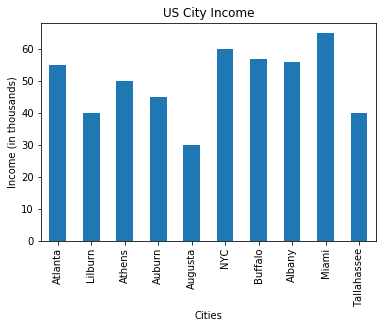

In [24]:
#Plot barchart of income (in thousands) of cities
city_table['income_in_k'].plot(kind='bar')

#Update x axis tick labels, label axes
plt.xticks(arange(len(city_table)), city_table['cities']);
plt.xlabel('Cities');
plt.ylabel('Income (in thousands)');
plt.title('US City Income');